# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk, re, string, warnings

Uploading the dataset and looking it the first 5 rows

In [3]:
sentair = pd.read_csv("C:/Users/Delmafia91/Downloads/AirlinesTweets.csv")
print(sentair.head(5))
print(sentair.describe())
print(sentair.info())
print(sentair.shape)

       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.700000e+17           neutral                        1.0000   
1  5.700000e+17          positive                        0.3486   
2  5.700000e+17           neutral                        0.6837   
3  5.700000e+17          negative                        1.0000   
4  5.700000e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

# Data Inspection
Checking the dataset

In [4]:
print('Size of Sentair is:', sentair.shape)
print('Columns of Sentair are:', sentair.columns)

Size of Sentair is: (14640, 15)
Columns of Sentair are: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


As a custom, we need to check for any null value within any data.

In [5]:
print('The number of null value in Sentair:', sentair.isna().sum())

The number of null value in Sentair: tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


What is the percentage of null value in the Sentair dataframe

In [6]:
print('Percentage of null or na values in Sentair')
((sentair.isnull() | sentair.isna()).sum()*100 / sentair.index.size).round(2)

Percentage of null or na values in Sentair


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

From this percentage, we can see that "Airline sentiment gold, negative reason gold, and tweet coord" have more than 90% missing data. Since we want to make life easier, we are going to remove these columns from the Sentair dataset.

In [7]:
sentair = sentair.drop(columns = ['tweet_coord', 'airline_sentiment_gold', 'negativereason_gold'])

In [9]:
print(sentair.head(5))
print(sentair.info())
print(sentair.shape)

       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.700000e+17           neutral                        1.0000   
1  5.700000e+17          positive                        0.3486   
2  5.700000e+17           neutral                        0.6837   
3  5.700000e+17          negative                        1.0000   
4  5.700000e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1   

Let us do a summary of the Sentair dataset

In [10]:
print(sentair.sum())

tweet_id                                                              8.33397e+21
airline_sentiment               neutralpositiveneutralnegativenegativenegative...
airline_sentiment_confidence                                              13178.5
negativereason_confidence                                                 6716.17
airline                         Virgin AmericaVirgin AmericaVirgin AmericaVirg...
name                            cairdinjnardinoyvonnalynnjnardinojnardinojnard...
retweet_count                                                                1210
text                            @VirginAmerica What @dhepburn said.@VirginAmer...
tweet_created                   2/24/2015 11:352/24/2015 11:152/24/2015 11:152...
dtype: object


In [11]:
print(sentair.mean())

tweet_id                        5.692605e+17
airline_sentiment_confidence    9.001689e-01
negativereason_confidence       6.382983e-01
retweet_count                   8.265027e-02
dtype: float64


In [12]:
print(sentair.std())

tweet_id                        8.098842e+14
airline_sentiment_confidence    1.628300e-01
negativereason_confidence       3.304398e-01
retweet_count                   7.457782e-01
dtype: float64


Now that we have an idea of what is going on, let us look at each sentiment for each airline and see what the main words are

We can do a sum of the number of tweets and add some plots for each airline as it relates to the sentiments; positive, negative, and neutral. Plotting always helps

In [17]:
sentair.groupby('airline').head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
504,5.700000e+17,positive,1.0000,NaN,NaN,United,rdowning76,0,@united thanks,2/24/2015 11:42,usa,NaN
505,5.700000e+17,positive,1.0000,NaN,NaN,United,CoreyAStewart,0,@united Thanks for taking care of that MR!! Ha...,2/24/2015 11:42,"Richmond, VA",Eastern Time (US & Canada)
506,5.700000e+17,negative,1.0000,Cancelled Flight,0.7030,United,CoralReefer420,0,@united still no refund or word via DM. Please...,2/24/2015 11:39,"Bay Area, California",Alaska
507,5.700000e+17,negative,1.0000,Late Flight,1.0000,United,lsalazarll,0,@united Delayed due to lack of crew and now de...,2/24/2015 11:39,NaN,Mountain Time (US & Canada)
508,5.700000e+17,positive,0.3441,NaN,0.0000,United,rombaa,0,@united thanks -- we filled it out. How's our ...,2/24/2015 11:38,NaN,NaN


Total number of sentiments for tweets for the airline 
 airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


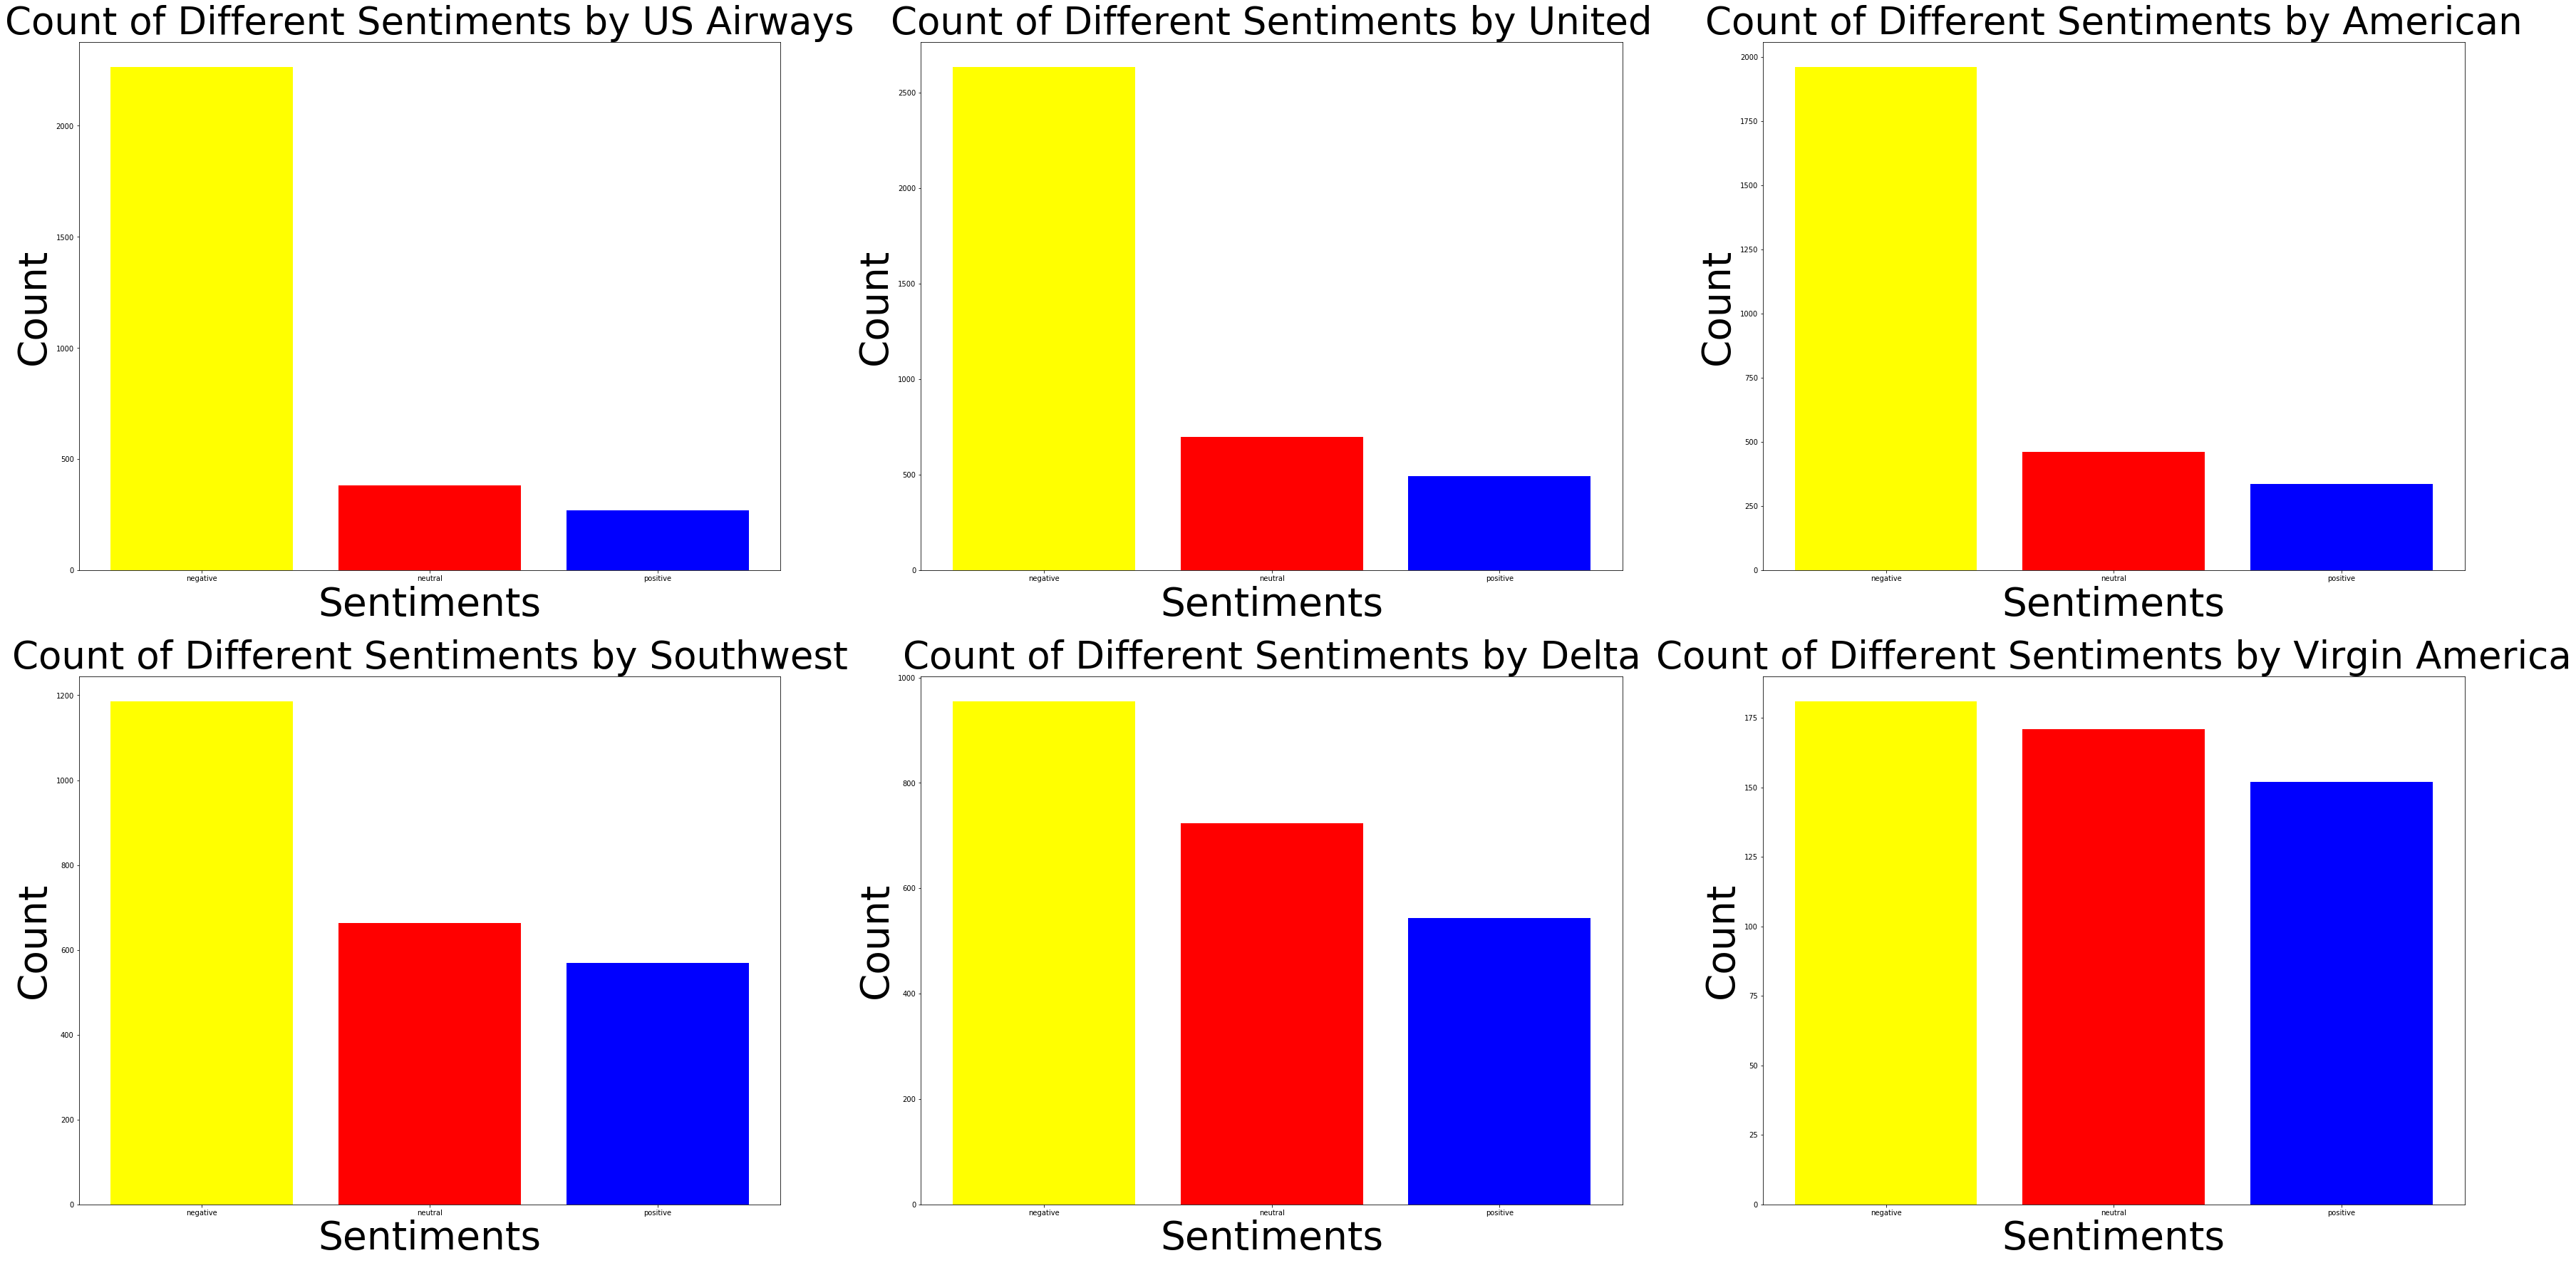

In [41]:
print('Total number of sentiments for tweets for the airline \n', sentair.groupby('airline')['airline_sentiment'].count().sort_values(ascending = False))
airline = ['US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']
plt.figure(1, figsize = (60, 30))
for m in airline: 
    indices = airline.index(m)
    plt.subplot(2, 3, indices + 1)
    sentair0 = sentair[sentair['airline'] == m]
    count = sentair0['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index, count, color = ['yellow', 'red', 'blue'])
    plt.xticks(Index, ['negative', 'neutral', 'positive'])
    plt.xlabel('Sentiments', fontsize = 55)
    plt.ylabel('Count', fontsize = 55)
    plt.title('Count of Different Sentiments by ' + m, fontsize = 53)
    

It looks as if Virgin America is doing a lot better at keeping customers happy. It is interesting how most people have negative sentiments about these six airline industries. Nevertheless, the top two airlines are Virgin America and Delta. Southwest should have been at the top of the latter since it gives two luggages and two carry-ons and personal items for free. Yet people still have bad sentiments about Southwest. Southwest is my favorite airline industry, by the way!

What are the most used words in Positive and Negative tweets?
There is something called "WordCloud" in python that can help us
find all the words we need. Since Negative words are the most 
frequent ones, we are going to take a look at them first.